# **PROJECT :HATE SPEECH DETECTION** #



PROBLEM STATEMENT:Hate speech refers to any form of verbal, written, or behavioral communication that attacks or uses derogatory or discriminatory language against individuals or groups based on characteristics such as religion, ethnicity, nationality, race, gender, or other identity factors. In this project, we will build a hate speech detection model using machine learning techniques in Python.

Hate speech detection is essentially a sentiment classification task. To train a model capable of identifying hate speech from text, we will use a dataset typically employed for sentiment analysis. For this specific task, we will utilize Twitter data to detect tweets that contain hate speech.

#Part 1: Import Twitter Hate Speech Data and Analyze#

In [5]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import nltk
import string
from nltk.text import Text

plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
os.chdir("/content/drive/MyDrive")
df = pd.read_csv("train_E6oV3lV.csv")

In [8]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## INFORMATIONS ABOUT THE DATA##

In [9]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 31962
Number of Features: 3


In [10]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [11]:
df.dtypes

,0
id,int64
label,int64
tweet,object


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [13]:
df.size

95886

### Checking for null values###

In [14]:
df.isnull().sum()

,0
id,0
label,0
tweet,0


###Extracting the Target Attribute for Each Class and Visualize###

Hate Speech: 2242
Free Speech: 29720


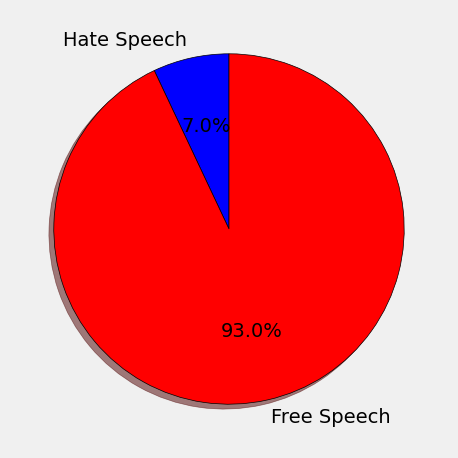

In [17]:
# Count the number of instances for each class in the 'label' column
hate_speech_count = df[df['label'] == 1].shape[0]
free_speech_count = df[df['label'] == 0].shape[0]
print('Hate Speech:', hate_speech_count)
print('Free Speech:', free_speech_count)

# Prepare data for pie chart visualization
speech_counts = [hate_speech_count, free_speech_count]
labels = ["Hate Speech", "Free Speech"]

# Create a pie chart to visualize the distribution of classes
plt.pie(speech_counts, labels=labels, shadow=True, wedgeprops={'edgecolor': 'black'},
        autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])

plt.tight_layout()
plt.show()